 # Black Friday Sales # 
 
**Feature Selection & Dimensionality Reduction**

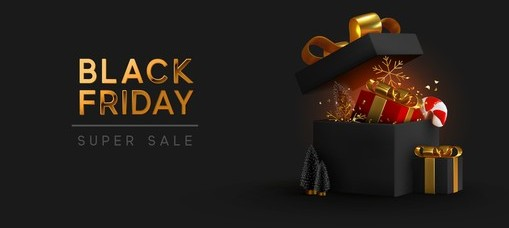

In [544]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [545]:
#reading the data
data = pd.read_csv("Problem Statement - Dimentionality Reduction-Dataset.csv")

In [546]:
data.shape

(550068, 12)

**There is a fairly good sample of data for implementing different feature selection and dimensionality reduction process**

**For a idea of the dataset checking the head and the tail of the given dataset**

In [547]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [548]:
data.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [549]:
data.describe() #a view of the numerical distribution of variables

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [550]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

**Interestingly the product category 2 and 3  have a large number of missing values. Imputing them with mean would be the best thing. But wait! a look at the describe function both min and max values are close in range. The left out columns would be the customers not purchasing anything from that category**

In [551]:
data= data.fillna(0) #filling the missing values with 0

In [552]:
#checking the dataypes of each column
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

**Both User_id and Product_id have large set of unique values and should not impact purchase price so we can safely drop those features**

In [553]:
data = data.drop(['User_ID','Product_ID'], axis=1)

In [554]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,M,55+,16,C,4+,0,8,0.0,0.0,7969


**To get an idea of the columns which are nominal categorical in nature**

In [555]:
for col in data.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(data[col].value_counts().head(30))

----------------------------------------Gender---------------------------------------- - 

M    414259
F    135809
Name: Gender, dtype: int64

----------------------------------------Age---------------------------------------- - 

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

----------------------------------------Occupation---------------------------------------- - 

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

----------------------------------------City_Category---------------------------------------- - 

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

----------------------------------------Stay_In_Current_City_Years---------------------------------------- - 

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

----------------------------------------Marital_Status---------------------------------------- - 

0    324731
1    225337
Name: Marital_Status, dtype: int64

----------------------------------------Product_Category_1---------------------------------------- - 

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

----------------------------------------Product_Category_2---------------------------------------- - 

0.0     173638
8.0      64088
14.0     55108
2.0      49217
16.0     43255
15.0     37855
5.0      26235
4.0      25677
6.0      16466
11.0     14134
17.0     13320
13.0     10531
9.0       5693
12.0      5528
10.0      3043
3.0       2884
18.0      2770
7.0        626
Name: Product_Category_2, dtype: int64

----------------------------------------Product_Category_3---------------------------------------- - 

0.0     383247
16.0     32636
15.0     28013
14.0     18428
17.0     16702
5.0      16658
8.0      12562
9.0      11579
12.0      9246
13.0      5459
6.0       4890
18.0      4629
4.0       1875
11.0      1805
10.0      1726
3.0        613
Name: Product_Category_3, dtype: int64

----------------------------------------Purchase---------------------------------------- - 

7011    191
7193    188
6855    187
6891    184
7012    183
6960    183
6879    182
7166    182
7027    182
6868    180
7165    180
6883    180
6858    179
7093    178
6931    178
7089    178
7185    178
6923    178
7114    177
7188    177
7085    176
6908    176
7060    176
7167    175
6973    175
6928    175
6949    175
7146    175
7159    175
6904    174
Name: Purchase, dtype: int64

In [556]:
#removing the special character '+' in the column Age and Stay_In_Current_Years

data['Age'] = (data['Age'].str.strip('+'))

data['Stay_In_Current_City_Years']=(data['Stay_In_Current_City_Years'].str.strip('+').astype('float'))

In [557]:
data.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years    float64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [558]:
from sklearn.preprocessing import LabelEncoder

In [559]:
pd.Series(le.fit_transform(data['Stay_In_Current_City_Years'])).head(10)

0    2
1    2
2    2
3    2
4    4
5    3
6    2
7    2
8    2
9    1
dtype: int64

In [560]:
data.head(10)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2.0,0,3,0.0,0.0,8370
1,F,0-17,10,A,2.0,0,1,6.0,14.0,15200
2,F,0-17,10,A,2.0,0,12,0.0,0.0,1422
3,F,0-17,10,A,2.0,0,12,14.0,0.0,1057
4,M,55,16,C,4.0,0,8,0.0,0.0,7969
5,M,26-35,15,A,3.0,0,1,2.0,0.0,15227
6,M,46-50,7,B,2.0,1,1,8.0,17.0,19215
7,M,46-50,7,B,2.0,1,1,15.0,0.0,15854
8,M,46-50,7,B,2.0,1,1,16.0,0.0,15686
9,M,26-35,20,A,1.0,1,8,0.0,0.0,7871


In [561]:
#to be able to see the age range we map it into constant value in range of 0 t0 6

In [562]:
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6
data['Age'] = data['Age'].apply(map_age)

In [563]:
# first five rows of the data
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0,10,A,2.0,0,3,0.0,0.0,8370
1,F,0,10,A,2.0,0,1,6.0,14.0,15200
2,F,0,10,A,2.0,0,12,0.0,0.0,1422
3,F,0,10,A,2.0,0,12,14.0,0.0,1057
4,M,6,16,C,4.0,0,8,0.0,0.0,7969


In [564]:
#correlation matrix
data.corr()


,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Age,1.000000,0.091463,-0.004712,0.311738,0.061197,0.018770,-0.007422,0.015839
Occupation,0.091463,1.000000,0.030005,0.024280,-0.007618,0.006712,0.012269,0.020833
Stay_In_Current_City_Years,-0.004712,0.030005,1.000000,-0.012819,-0.004213,0.001262,0.001977,0.005422
Marital_Status,0.311738,0.024280,-0.012819,1.000000,0.019888,0.001099,-0.004629,-0.000463
Product_Category_1,0.061197,-0.007618,-0.004213,0.019888,1.000000,-0.067877,-0.385534,-0.343703
Product_Category_2,0.018770,0.006712,0.001262,0.001099,-0.067877,1.000000,0.094750,0.052288
Product_Category_3,-0.007422,0.012269,0.001977,-0.004629,-0.385534,0.094750,1.000000,0.288501
Purchase,0.015839,0.020833,0.005422,-0.000463,-0.343703,0.052288,0.288501,1.000000


In [565]:
corr_matrix = data.corr().abs()

In [566]:

corr_matrix 

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Age,1.000000,0.091463,0.004712,0.311738,0.061197,0.018770,0.007422,0.015839
Occupation,0.091463,1.000000,0.030005,0.024280,0.007618,0.006712,0.012269,0.020833
Stay_In_Current_City_Years,0.004712,0.030005,1.000000,0.012819,0.004213,0.001262,0.001977,0.005422
Marital_Status,0.311738,0.024280,0.012819,1.000000,0.019888,0.001099,0.004629,0.000463
Product_Category_1,0.061197,0.007618,0.004213,0.019888,1.000000,0.067877,0.385534,0.343703
Product_Category_2,0.018770,0.006712,0.001262,0.001099,0.067877,1.000000,0.094750,0.052288
Product_Category_3,0.007422,0.012269,0.001977,0.004629,0.385534,0.094750,1.000000,0.288501
Purchase,0.015839,0.020833,0.005422,0.000463,0.343703,0.052288,0.288501,1.000000


In [567]:
#selecting upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

<ipython-input-567-9c1639558c76>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [568]:
upper

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Age,NaN,0.091463,0.004712,0.311738,0.061197,0.018770,0.007422,0.015839
Occupation,NaN,NaN,0.030005,0.024280,0.007618,0.006712,0.012269,0.020833
Stay_In_Current_City_Years,NaN,NaN,NaN,0.012819,0.004213,0.001262,0.001977,0.005422
Marital_Status,NaN,NaN,NaN,NaN,0.019888,0.001099,0.004629,0.000463
Product_Category_1,NaN,NaN,NaN,NaN,NaN,0.067877,0.385534,0.343703
Product_Category_2,NaN,NaN,NaN,NaN,NaN,NaN,0.094750,0.052288
Product_Category_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.288501
Purchase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**for better interpretability we can use an heat map to compare 

<AxesSubplot:>

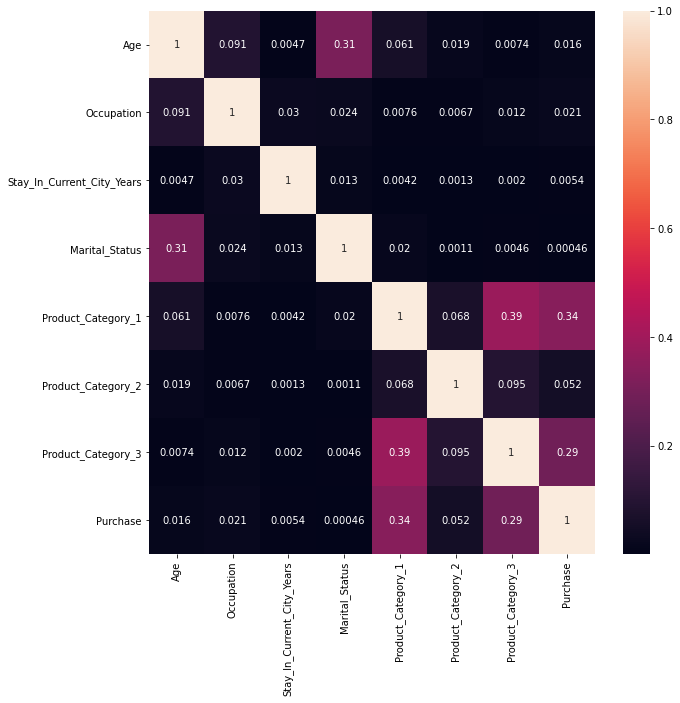

In [569]:
plt.figure(figsize = (10,10))
sns.heatmap(
    data.corr().abs(),
    annot=True
)


### We have an interesting set of observation ###
- **Age and martial status are very highly correlated**
- **correlation between product category can be concluded by saying that there are number of products brought by the customer which also confirms our initial analyses imputing them with 0**
- **for the other features they are the correlation is significantly smaller**


In [570]:
#CHECKING THE DISTRIBUTION OF GENDER
data['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [571]:
#ONE HOT ENCODING 
dummy = pd.get_dummies(data['Gender'])
data = pd.concat([data,dummy], axis = 1)

In [572]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,F,M
0,F,0,10,A,2.0,0,3,0.0,0.0,8370,1,0
1,F,0,10,A,2.0,0,1,6.0,14.0,15200,1,0
2,F,0,10,A,2.0,0,12,0.0,0.0,1422,1,0
3,F,0,10,A,2.0,0,12,14.0,0.0,1057,1,0
4,M,6,16,C,4.0,0,8,0.0,0.0,7969,0,1


In [573]:
#CHECKING CITY_CATEGORY DISTRIBUTION

data['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [574]:
#ONE HOT ENCODING OF CITY CATEGORY
dummy =pd.get_dummies(data['City_Category'])
data = pd.concat([data,dummy], axis = 1)

In [575]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,F,M,A,B,C
0,F,0,10,A,2.0,0,3,0.0,0.0,8370,1,0,1,0,0
1,F,0,10,A,2.0,0,1,6.0,14.0,15200,1,0,1,0,0
2,F,0,10,A,2.0,0,12,0.0,0.0,1422,1,0,1,0,0
3,F,0,10,A,2.0,0,12,14.0,0.0,1057,1,0,1,0,0
4,M,6,16,C,4.0,0,8,0.0,0.0,7969,0,1,0,0,1


In [576]:
#DROPPING THE STRING COLUMNS
data = data.drop(['Gender','City_Category'], axis=1)

In [577]:
data.head()

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,F,M,A,B,C
0,0,10,2.0,0,3,0.0,0.0,8370,1,0,1,0,0
1,0,10,2.0,0,1,6.0,14.0,15200,1,0,1,0,0
2,0,10,2.0,0,12,0.0,0.0,1422,1,0,1,0,0
3,0,10,2.0,0,12,14.0,0.0,1057,1,0,1,0,0
4,6,16,4.0,0,8,0.0,0.0,7969,0,1,0,0,1


In [578]:
#CHECKING DISTRIBUTION OF OCCUPATION
data['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [579]:
#CHECKING DISTRIBUTION OF AGE COLUMN
data['Age'].value_counts()

2    219587
3    110013
1     99660
4     45701
5     38501
6     21504
0     15102
Name: Age, dtype: int64

In [580]:
#CHECKING DISTRIBUTION OF STAY COLUMN
data['Stay_In_Current_City_Years'].value_counts()

1.0    193821
2.0    101838
3.0     95285
4.0     84726
0.0     74398
Name: Stay_In_Current_City_Years, dtype: int64

**LABEL ENCODING CAN BE DONE ON THE ABOVE TWO COLUMNS**

In [581]:
#SEPERATING INTO TARGET AND FEATURE 

In [582]:
features = data.drop('Purchase',axis=1)

In [583]:
target = data['Purchase']

In [584]:
#IMPORTING THE TRAIN_TEST_SPLIT

In [585]:
from sklearn.model_selection import train_test_split

In [586]:
#Dividing the data into test and train datasets

In [587]:
X_train, X_test, Y_train, Y_test = train_test_split(features,target,random_state =34 , test_size = 0.25)

In [588]:
#IMPORTING LABEL ENCODER

In [589]:
from sklearn.preprocessing import LabelEncoder

In [590]:
le = LabelEncoder()
le.fit_transform(X_train['Age'])

array([5, 2, 3, ..., 1, 3, 2])

In [591]:
le = LabelEncoder()
le.fit_transform(X_train['Stay_In_Current_City_Years'])

array([4, 3, 3, ..., 4, 4, 0])

In [592]:
le = LabelEncoder()
le.fit_transform(X_test['Age'])

array([3, 6, 2, ..., 4, 2, 2])

In [593]:
le = LabelEncoder()
le.fit_transform(X_test['Stay_In_Current_City_Years'])

array([1, 3, 4, ..., 4, 0, 3])

In [594]:
# Feature Scaling of training and test set
from sklearn.preprocessing import StandardScaler
sc_X_train = StandardScaler()
X_train = sc_X_train.fit_transform(X_train)

sc_X_test = StandardScaler()
X_test = sc_X_test.fit_transform(X_test)

In [595]:
#IMPORTING PCA 
from sklearn.decomposition import PCA 

In [596]:
#FITTING INTO PCA OBJECT
pca = PCA()
pca.fit(X_train)

PCA()

In [597]:
#FINDING EIGEN VALUES
eigenvalues = pca.explained_variance_
eigenvalues

array([2.03831753e+00, 1.60862417e+00, 1.51056415e+00, 1.42365009e+00,
       1.21016159e+00, 1.01140606e+00, 9.67772823e-01, 9.44695971e-01,
       6.77534781e-01, 6.07301925e-01, 5.19345903e-29, 8.87936997e-33])

In [598]:
#FINDING EIGEN MATRIX
pca.components_

array([[-3.70014562e-05, -1.59879116e-01, -2.36967731e-02,
         1.57432856e-02,  9.22572901e-02, -1.40893345e-02,
        -8.39957945e-02,  6.91727058e-01, -6.91727058e-01,
        -3.92302758e-03,  2.20492804e-02, -1.97449530e-02],
       [ 1.83902210e-01,  6.39776764e-02, -1.06732095e-02,
         1.24686336e-01,  1.18435772e-02,  2.74351619e-02,
         2.48592974e-02,  2.77409546e-02, -2.77409546e-02,
         1.59015205e-01, -7.27678786e-01,  6.23356975e-01],
       [-4.06276950e-01, -1.32891442e-01, -4.00904765e-02,
        -3.19292586e-01,  5.68203659e-02, -7.04412400e-02,
        -1.01240564e-01, -2.09402892e-02,  2.09402892e-02,
         6.96632863e-01, -3.10565017e-01, -3.35646781e-01],
       [ 2.24081871e-01,  6.35861356e-02, -9.46199329e-03,
         1.96030157e-01,  6.47400800e-01, -2.39372701e-01,
        -6.41755523e-01, -8.07816839e-02,  8.07816839e-02,
         3.78749719e-02,  2.43639569e-02, -6.22097430e-02],
       [ 4.71981765e-01,  1.38089610e-01, -8.2398067

In [599]:
#EIGEN VALUES
n_samples = X_train.shape[0]
# We center the data and compute the sample covariance matrix.
X_train -= np.mean(X_train, axis=0)
cov_matrix = np.dot(X_train.T, X_train) / n_samples
for eigenvector in pca.components_:
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))

2.0383125939873015
1.6086202697401208
1.5105604860704545
1.4236466416201181
1.2101586539179614
1.0114036044633485
0.9677704771202669
0.9446936815876078
0.6775331385820078
0.6073004529108041
-1.9907461851440816e-15
-1.1750048522690948e-23


**THE TWO MOST IMPORTANT PCA ARE ONE WITH EIGEN VALES 45.06 AND 42.44**

In [600]:
#SELECTING 8 FEATURES

In [601]:
pca = PCA(n_components=8).fit(X_train)

In [602]:
#TRANSFORMING INTO PCA COMPONENTS
X_train_transformed = pca.transform(X_train)
X_valid_transformed = pca.transform(X_test)

In [603]:
X_train_transformed.shape

(412551, 8)

In [604]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'VARIANCE %')

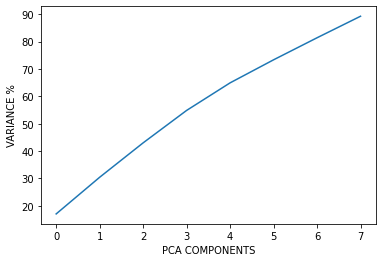

In [605]:
plt.figure()
plt.plot(range(0,8),np.cumsum(pca.explained_variance_ratio_)*100)
    
plt.xlabel('PCA COMPONENTS')
plt.ylabel("VARIANCE %")
    
#plt.plot(range(0,30), )

**A HIGH VARIANCE RATIO MAINTAINED WITH 8 FEATURES**